In [41]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN, KMeans
from PIL import Image

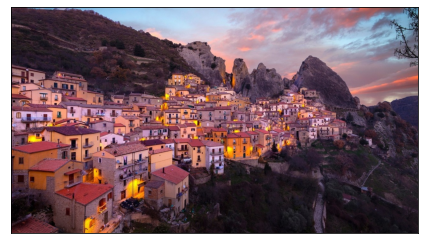

In [48]:
img = Image.open("testing.jpeg")
fig,ax = plt.subplots(1,1)
ax.imshow(img)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

In [49]:
data = np.asarray(img,dtype="int32")
print(data.shape)

(712, 1280, 3)


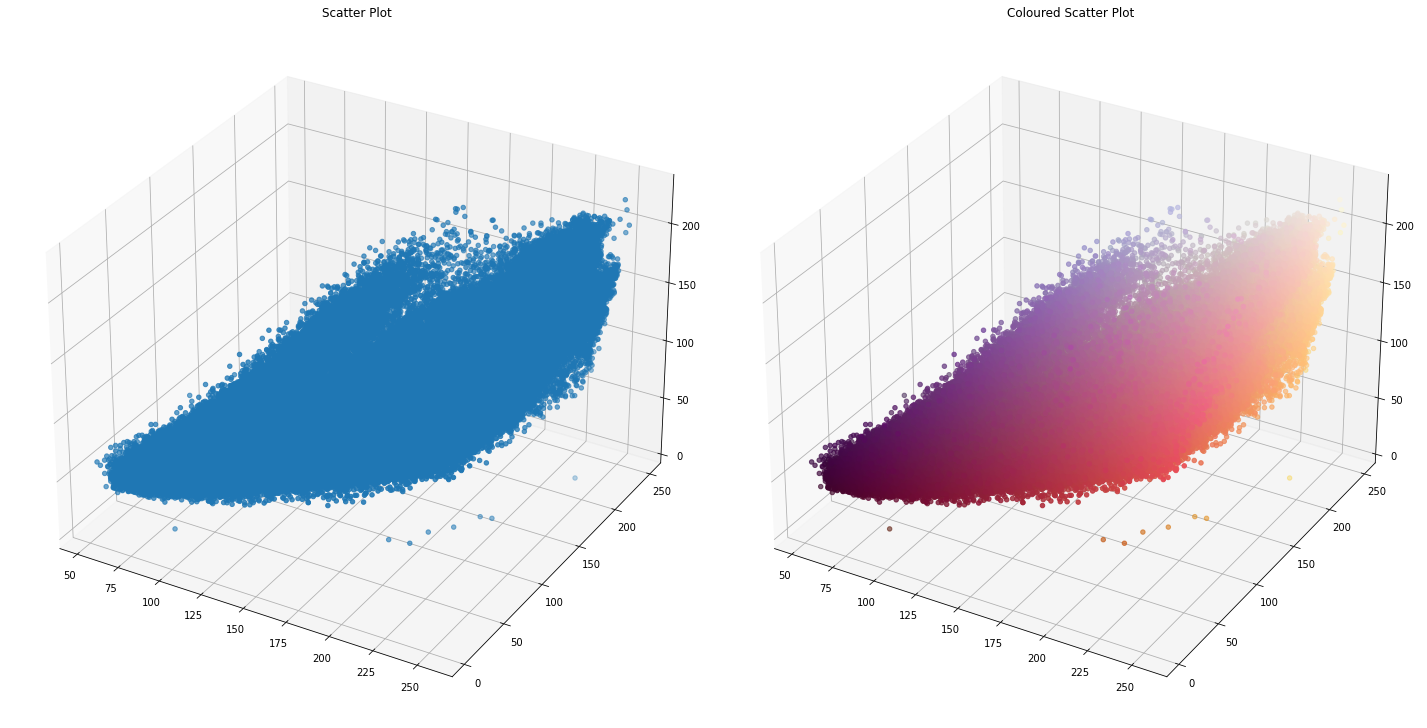

In [44]:
from mpl_toolkits.mplot3d import Axes3D

x = data[:,:,0]
y = data[:,:,1]
z = data[:,:,2]
#applies tuple to the iterable data.reshape without using a for loop
C = list(map(tuple,data.reshape(data.shape[0]*data.shape[1],3)/255.0)) #2D RGB/RGBA array for c parameter in scatter
#List of tuples
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121,projection='3d')
ax1.scatter(x,y,z)
ax1.set_title('Scatter Plot')

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(x,y,z,c=C)
ax2.set_title('Coloured Scatter Plot')

plt.tight_layout()
plt.show()


In [51]:
points = data.reshape(data.shape[0]*data.shape[1],3)/255.0
kmeans = KMeans(n_clusters=8).fit(points)
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

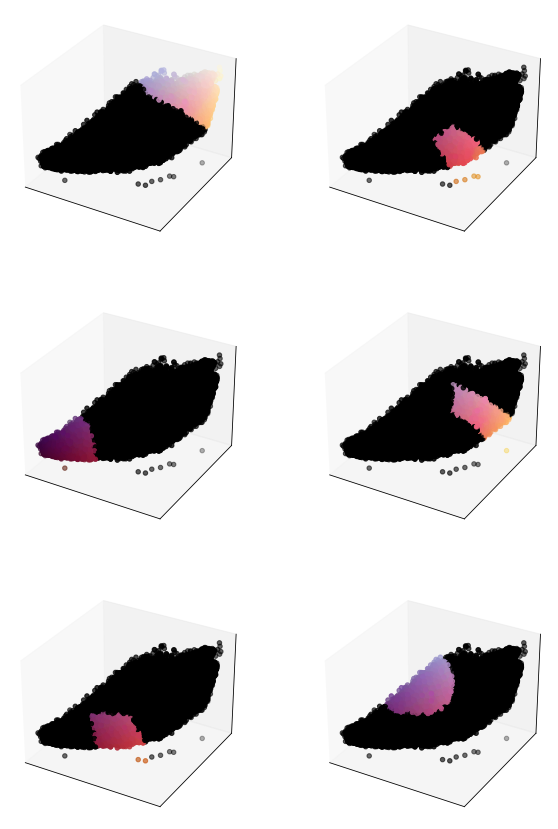

In [46]:
fig = plt.figure(figsize=(10,15))
for i in range(6):
    ax = fig.add_subplot(3,2,i+1,projection='3d')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    C = list(map(tuple, points*(kmeans.labels_==i).reshape(-1,1)))
    ax.scatter(x,y,z,c=C)
plt.show()

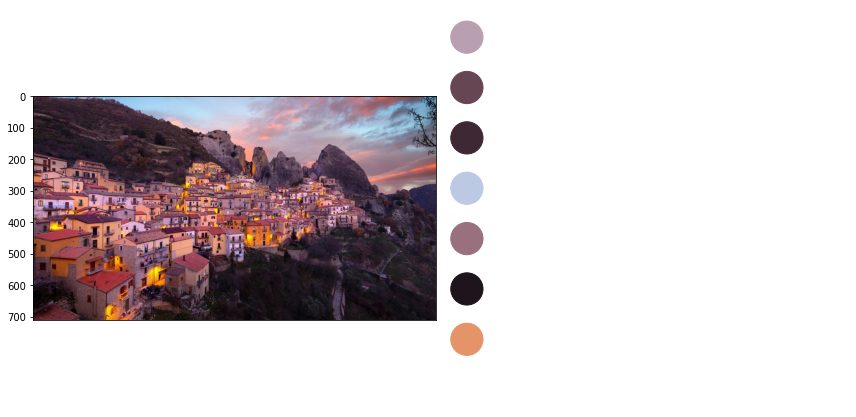

In [55]:
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(img)

ax[0].set_xticks([])
ax[1].set_yticks([])

for i in range(8):
    circle=plt.Circle((0.05,(i+1.4)/8),0.04,color=(points*(kmeans.labels_==i).reshape(-1,1)).sum(axis=0)/sum((kmeans.labels_==i)))
    ax[1].add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')

plt.tight_layout()
plt.show()